# Data Prep

### Data Fetch From Trino


In [1]:
"""
This script establishes a connection to a Presto database via the Trino Python client, 
executes a SQL query to fetch data, and then structures the fetched data into a pandas DataFrame.
The DataFrame is organized with appropriate column names, making the data ready for analysis.
"""

import trino
import pandas as pd
import getpass

# Get password
password = getpass.getpass("Enter your password: ")

# Connect to Trino
conn = trino.dbapi.connect(
    host="presto-gateway.corp.mongodb.com",
    port=443,
    user="jiawei.zhou@mongodb.com",
    catalog="awsdatacatalog",
    http_scheme="https",
    auth=trino.auth.BasicAuthentication("jiawei.zhou@mongodb.com", password),
)

# Execute query
cur = conn.cursor()

/Users/jiawei.zhou/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
cur.execute(
    f"""
select
	*
from
	awsdatacatalog.ps_analytics.ps_impact_matching_dataset
"""
)

# Extract column names
columns = [desc[0] for desc in cur.description]

# Fetch rows
rows = cur.fetchall()

# Create DataFrame
df_raw = pd.DataFrame(rows, columns=columns)

In [3]:
# Configure pandas display options for maximum rows and columns

# Set the maximum number of displayed rows
pd.set_option("display.max_rows", 100)  # For example, display up to 100 rows

# Set the maximum number of displayed columns
pd.set_option("display.max_columns", 50)  # For example, display up to 50 columns

In [4]:
# Create a copy of the original DataFrame and display the first few rows.
data = df_raw.copy()

# Display rows
data.head()

,workload_id,account_id,category,submission_date,run_rate_type,starting_run_rate__c,workload_run_rate_fy24_90version,workload_database_product,workload_created_date,workload_approved_date,workload_first_run_rate_arr_date,workload_approved_or_first_run_rate_arr_date,workload_owner_team,workload_current_owner_team,workload_owner_segment,workload_current_owner_segment,workload_owner_area_group,workload_current_owner_area_group,workload_6k_run_rate_arr_date,workload_12k_run_rate_arr_date,workload_25k_run_rate_arr_date,workload_50k_run_rate_arr_date,workload_100k_run_rate_arr_date,workload_maximum_run_rate_arr,workload_uses_search,workload_uses_device_sync,account_arr,first_arr_date,segment__c,area_group__c,ps_wl
0,a2c6R000001CtJtQAK,001A000000xizppIAA,Atlas NWL,2023-03-15,Splits,0.00,13213.53,Atlas,2023-03-11,2023-03-21,2023-03-11,2023-03-21,None,Growth AE,None,Growth,None,Americas,2023-05-01,2023-06-17,None,None,None,13827.84,False,False,23314014.0,2014-01-19,Growth,Americas,1
1,a2c6R0000048IjGQAU,001A000001Wbj6wIAB,Atlas NWL,2023-05-04,Acquisition,0.00,2260.52,Atlas,2023-04-13,2023-05-16,2023-05-14,2023-05-16,None,Acq AE,None,Acquisition,None,AMER,None,None,None,None,None,2335.00,False,False,635.0,2023-05-12,Growth,Americas,1
2,a2c6R000001CsIBQA0,0012K00001vHRLzQAO,Atlas NWL,2023-02-27,Splits,13859.53,135076.81,Atlas,2023-02-27,2023-02-28,2023-02-27,2023-02-28,None,Growth AE,None,Growth,None,Americas,2023-02-27,2023-02-27,2023-02-27,2023-03-08,2023-03-26,231902.88,False,False,625240.0,2022-01-01,Partner,ISV,1
3,a2c6R000001Cq8sQAC,0016R00003AQxf7QAD,EA NWL,2023-01-30,EA,NaN,136321.00,EA,2023-01-30,2023-01-30,2023-01-30,2023-01-30,None,Strategic AE,None,Growth,None,Americas,2023-01-30,2023-01-30,2023-01-30,2023-01-30,2023-01-30,136321.00,False,False,1061486.0,2017-08-04,Growth,Americas,1
4,a2c6R000004OamEQAS,001A000001KJmhhIAD,Atlas NWL,2023-09-20,Splits,288545.91,66866.52,Atlas,2023-09-15,2023-09-20,2023-09-30,2023-09-30,None,Growth AE,None,Growth,None,Americas,2023-10-24,2023-11-17,2023-11-28,2024-01-22,None,70678.96,False,False,1141788.0,2017-05-26,Growth,Americas,1


# Data Profiling


### Duplicate Values

In [5]:
import pandas as pd

# Check for duplicate 'workload_id' values
duplicates = data['workload_id'].duplicated().any()

if duplicates:
    print("There are duplicate workload_id values in the dataset.")
else:
    print("There are no duplicate workload_id values in the dataset.")


There are no duplicate workload_id values in the dataset.


### Null Values

In [6]:
import pandas as pd

# Calculate the total number of workloads (rows in your DataFrame)
total_workloads = data.shape[0]

# Calculate the null values count for each column
null_values = data.isnull().sum()

# Calculate the percentage of null values for each column
null_values_percentage = (null_values / total_workloads) * 100

# Create a DataFrame to display the null values count and percentage
null_values_df = pd.DataFrame({'Null Count': null_values, 'Percentage': null_values_percentage})

# Convert the percentage values to string format with a '%' sign for better readability
null_values_df['Percentage'] = null_values_df['Percentage'].apply(lambda x: f"{x:.2f}%")

# Display rows where the Null Count is greater than 0
filtered_null_values_df = null_values_df[null_values_df['Null Count'] > 0]

# If you want to see the result
filtered_null_values_df


,Null Count,Percentage
category,64,0.88%
submission_date,64,0.88%
run_rate_type,64,0.88%
starting_run_rate__c,1214,16.78%
workload_run_rate_fy24_90version,64,0.88%
workload_owner_team,7234,100.00%
workload_current_owner_team,1,0.01%
workload_owner_segment,7234,100.00%
workload_current_owner_segment,1,0.01%
workload_owner_area_group,7234,100.00%


In [7]:
import pandas as pd

# Function to calculate null count and percentage for each column in a group
def null_info(group):
    total_workloads = group.shape[0]
    null_counts = group.isnull().sum()
    null_percentage = (null_counts / total_workloads) * 100
    # Creating a DataFrame from the null counts and percentage
    null_df = pd.DataFrame({'Null Count': null_counts, 'Percentage': null_percentage})
    # Filter to keep only rows where Null Count is greater than 0
    null_df = null_df[null_df['Null Count'] > 0]
    # Optional: Convert the percentage to a more readable format
    null_df['Percentage'] = null_df['Percentage'].apply(lambda x: f"{x:.2f}%")
    return null_df

# Group the data by 'ps_wl' and apply the null_info function to each group
grouped_null_info = data.groupby('ps_wl').apply(null_info)

# Displaying the result
grouped_null_info


Null Count Percentage
ps_wl                                                         
0     category                                   37      1.36%
      submission_date                            37      1.36%
      run_rate_type                              37      1.36%
      starting_run_rate__c                      207      7.63%
      workload_run_rate_fy24_90version           37      1.36%
      workload_owner_team                      2712    100.00%
      workload_owner_segment                   2712    100.00%
      workload_owner_area_group                2712    100.00%
      workload_current_owner_area_group          21      0.77%
      workload_6k_run_rate_arr_date             867     31.97%
      workload_12k_run_rate_arr_date           1241     45.76%
      workload_25k_run_rate_arr_date           1702     62.76%
      workload_50k_run_rate_arr_date           2177     80.27%
      workload_100k_run_rate_arr_date          2504     92.33%
      first_arr_date                              1      0.04%
      area_group__c                               1      0.04%
1     category                                   27      0.60%
      submission_date                            27      0.60%
      run_rate_type                              27      0.60%
      starting_run_rate__c                     1007     22.27%
      workload_run_rate_fy24_90version           27      0.60%
      workload_owner_team                      4522    100.00%
      workload_current_owner_team                 1      0.02%
      workload_owner_segment                   4522    100.00%
      workload_current_owner_segment              1      0.02%
      workload_owner_area_group                4522    100.00%
      workload_current_owner_area_group          41      0.91%
      workload_6k_run_rate_arr_date             625     13.82%
      workload_12k_run_rate_arr_date            985     21.78%
      workload_25k_run_rate_arr_date           1623     35.89%
      workload_50k_run_rate_arr_date           2634     58.25%
      workload_100k_run_rate_arr_date          3633     80.34%
      area_group__c                               5      0.11%

### 0 Values

In [8]:
# Calculate the number and percentage of workloads with 0 value for all columns
zero_values = (data == 0).sum()
zero_values_percentage = (zero_values / total_workloads) * 100

# Create a DataFrame to display the results
zero_values_df = pd.DataFrame({'Zero Count': zero_values, 'Percentage': zero_values_percentage})
zero_values_df = zero_values_df[(zero_values_df['Zero Count'] > 0) & (zero_values_df['Percentage'] > 0)]
zero_values_df['Percentage'] = zero_values_df['Percentage'].apply(lambda x: f"{x:.2f}%")

zero_values_df


,Zero Count,Percentage
starting_run_rate__c,2029,28.05%
workload_run_rate_fy24_90version,831,11.49%
workload_uses_search,6528,90.24%
workload_uses_device_sync,7092,98.04%
account_arr,1,0.01%
ps_wl,2712,37.49%


In [9]:
import pandas as pd

# Function to calculate zero count and percentage for each column in a group
def zero_info(group):
    total_workloads = group.shape[0]
    zero_counts = (group == 0).sum()
    zero_percentage = (zero_counts / total_workloads) * 100
    # Creating a DataFrame from the zero counts and percentage
    zero_df = pd.DataFrame({'Zero Count': zero_counts, 'Percentage': zero_percentage})
    # Filter to keep only rows where Zero Count is greater than 0
    zero_df = zero_df[zero_df['Zero Count'] > 0]
    # Convert the percentage to a more readable format
    zero_df['Percentage'] = zero_df['Percentage'].apply(lambda x: f"{x:.2f}%")
    return zero_df

# Group the data by 'ps_wl' and apply the zero_info function to each group
grouped_zero_info = data.groupby('ps_wl').apply(zero_info)

# Displaying the result
print(grouped_zero_info)


                                        Zero Count Percentage
ps_wl                                                        
0     starting_run_rate__c                     923     34.03%
      workload_run_rate_fy24_90version         360     13.27%
      workload_uses_search                    2491     91.85%
      workload_uses_device_sync               2658     98.01%
      account_arr                                1      0.04%
      ps_wl                                   2712    100.00%
1     starting_run_rate__c                    1106     24.46%
      workload_run_rate_fy24_90version         471     10.42%
      workload_uses_search                    4037     89.27%
      workload_uses_device_sync               4434     98.05%


### Distribution

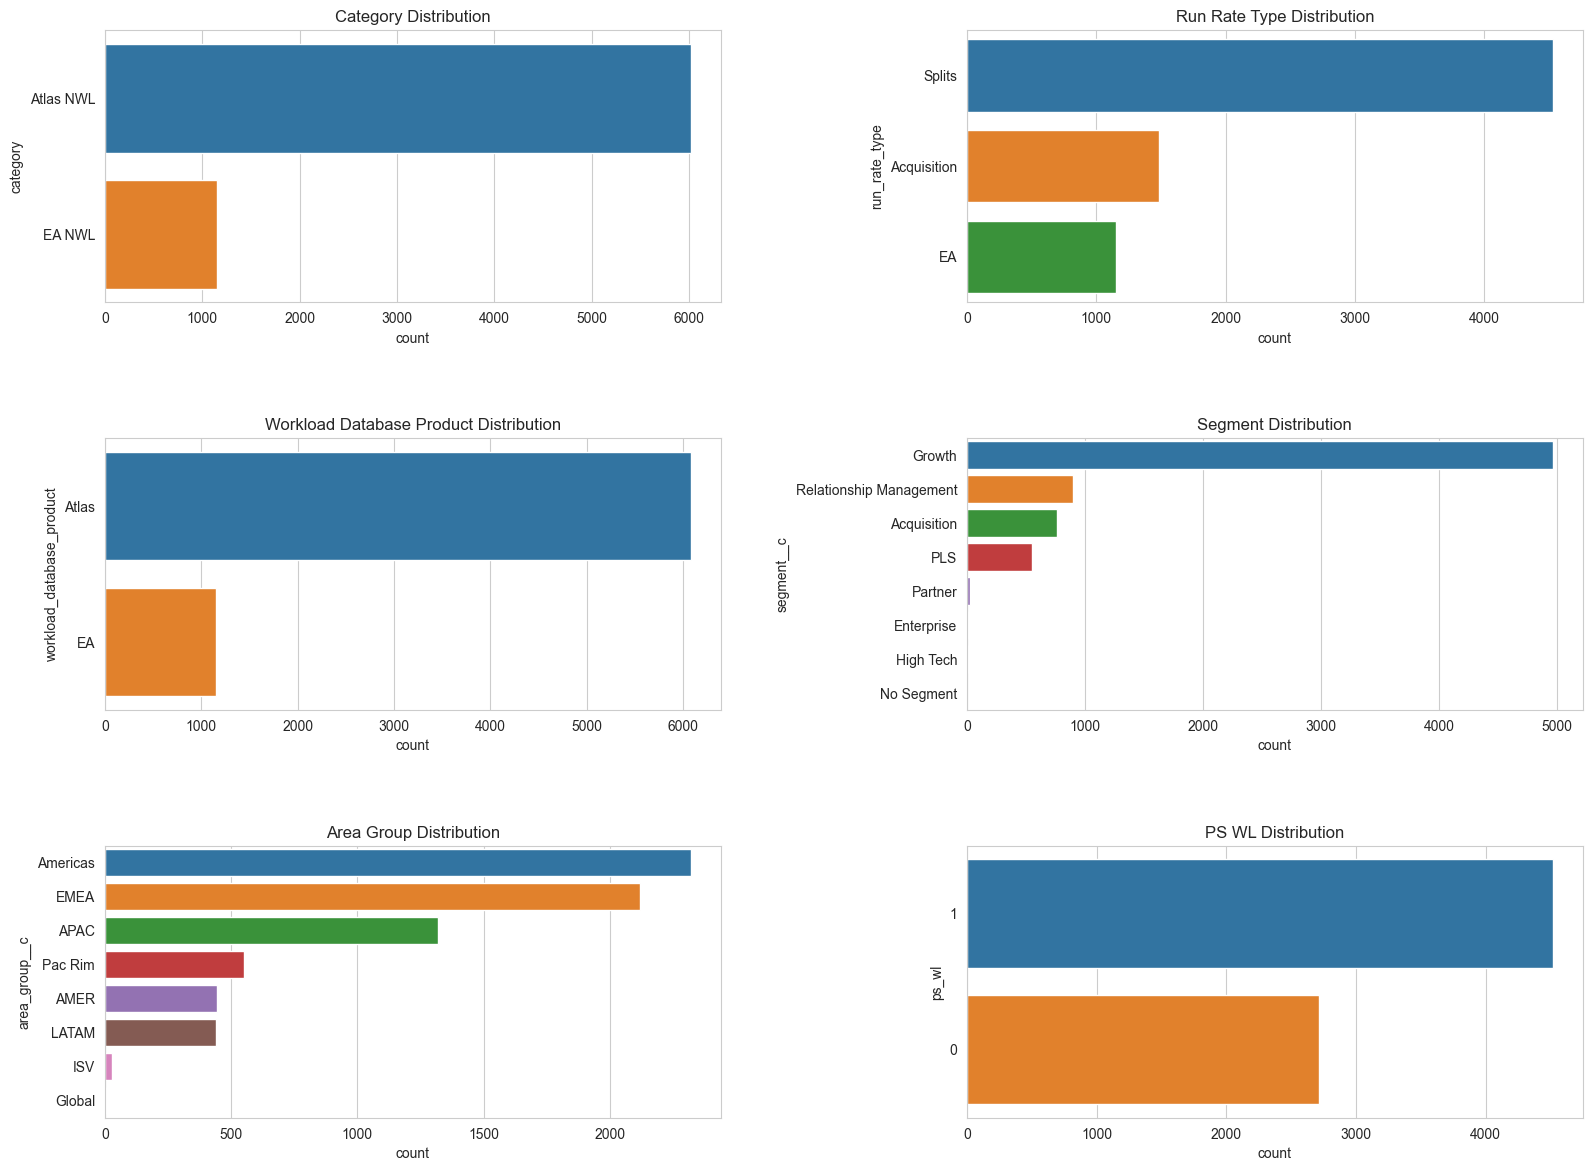

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Define a function to plot categorical data on a given axis
def plot_categorical_data(ax, column, title, data):
    sns.countplot(y=column, data=data, order=data[column].value_counts().index, ax=ax)
    ax.set_title(title)

# Your categorical columns and titles
categorical_columns = ['category', 'run_rate_type', 'workload_database_product', 'segment__c', 'area_group__c', 'ps_wl']
titles = ['Category Distribution', 'Run Rate Type Distribution', 'Workload Database Product Distribution', 
          'Segment Distribution', 'Area Group Distribution', 'PS WL Distribution']

# Determine the layout of the subplots
n = len(categorical_columns)
ncols = 2
nrows = n // ncols + (n % ncols > 0)

# Adjust the figsize to make each plot smaller
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, 4 * nrows)) # Adjust figsize here
fig.tight_layout(pad=3.0) # Adjust layout padding if necessary

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Loop through the categories and titles, plotting on the appropriate subplot
for i, (column, title) in enumerate(zip(categorical_columns, titles)):
    plot_categorical_data(axes[i], column, title, data)

# Hide any unused axes if you have an odd number of plots
for j in range(i + 1, nrows * ncols):
    fig.delaxes(axes[j])

# Optionally adjust the layout further if needed
plt.subplots_adjust(hspace=0.5, wspace=0.4) # Adjust horizontal and vertical spacing

plt.show()


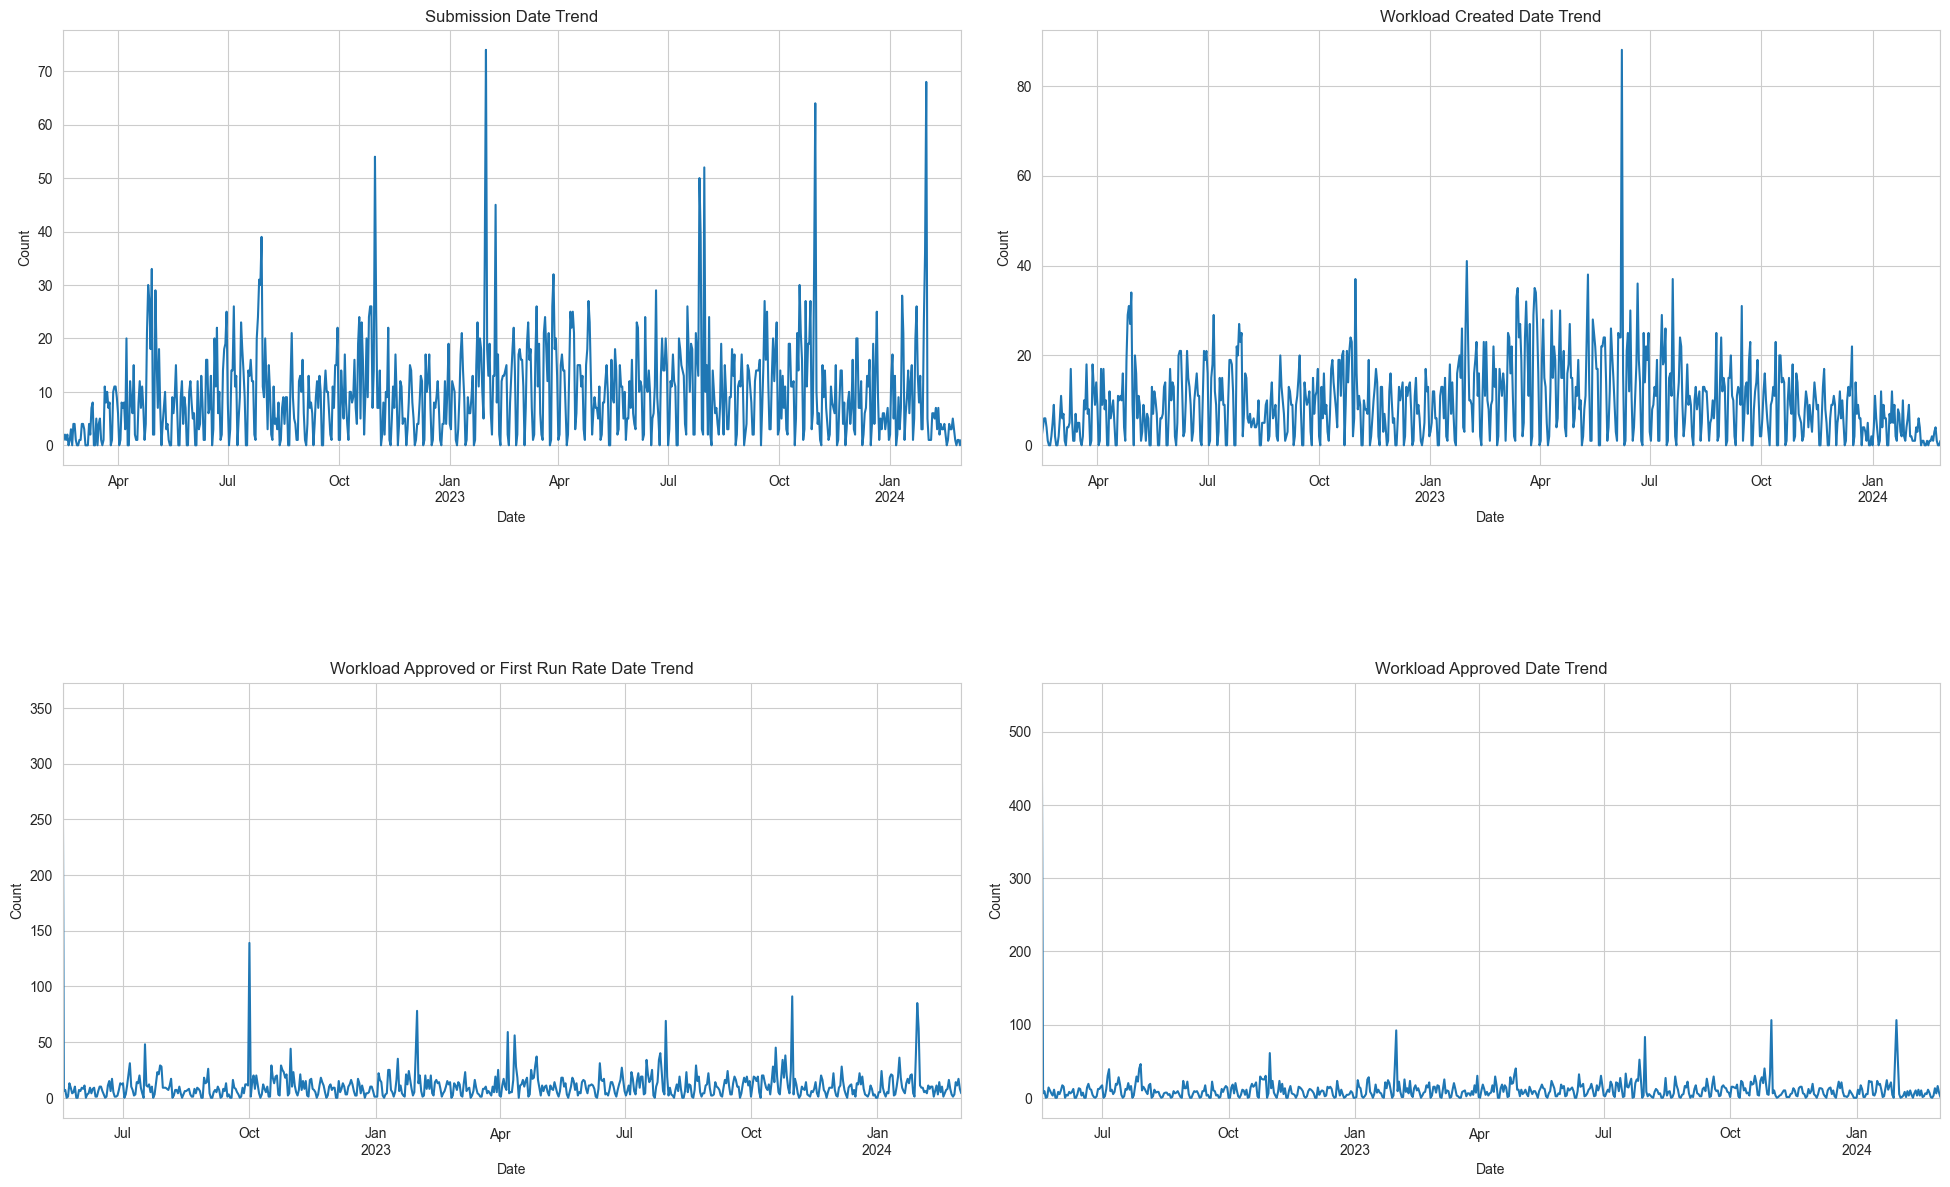

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define a function to plot time series data on a given axis
def plot_time_series_data(ax, column, title, data):
    # Convert the column to datetime and set it as the index
    temp_data = data.copy()
    temp_data[column] = pd.to_datetime(temp_data[column])
    temp_data.set_index(column, inplace=True)
    
    # Now resample and plot
    temp_data.resample('D').size().plot(ax=ax)  # Use size() for counting
    ax.set_title(title)
    ax.set_xlabel('Date')
    ax.set_ylabel('Count')


# Your time series columns and titles, including 'workload_approved_date'
time_series_columns = [
    'submission_date', 
    'workload_created_date', 
    'workload_approved_or_first_run_rate_arr_date',
    'workload_approved_date' 
]
titles = [
    'Submission Date Trend', 
    'Workload Created Date Trend', 
    'Workload Approved or First Run Rate Date Trend',
    'Workload Approved Date Trend'
]

# Determine the layout of the subplots
n = len(time_series_columns)
ncols = 2
nrows = n // ncols + (n % ncols > 0)

# Create a figure and axes for the subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 6 * nrows))
fig.tight_layout(pad=3.0)

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Loop through the categories and titles, plotting on the appropriate subplot
for i, (column, title) in enumerate(zip(time_series_columns, titles)):
    plot_time_series_data(axes[i], column, title, data)

# Hide any unused axes if you have an odd number of plots
for j in range(i + 1, nrows * ncols):
    fig.delaxes(axes[j])

# Adjust layout to prevent title and y-axis label overlap
plt.subplots_adjust(hspace=0.5)  # Increase hspace if titles still overlap

plt.show()


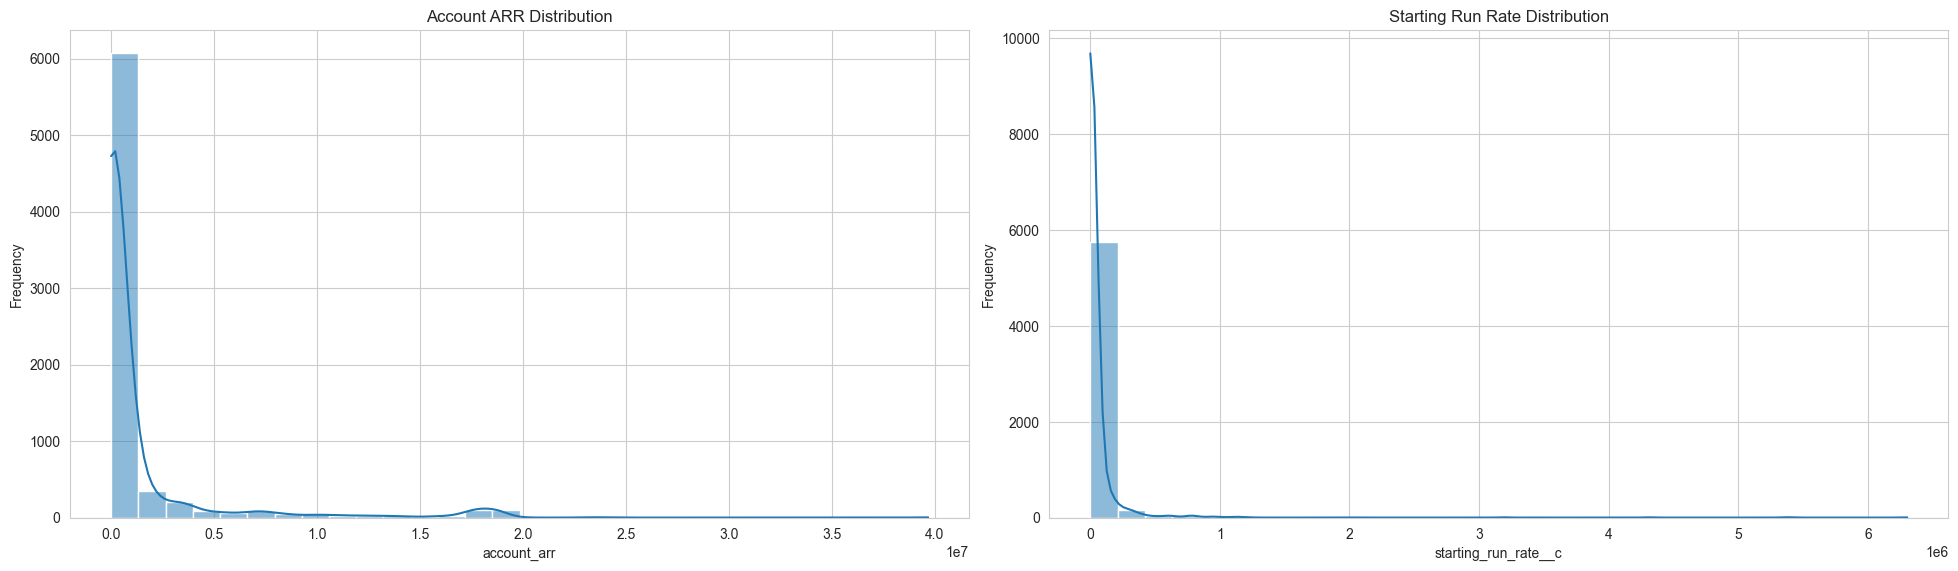

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define a function to plot numerical data on a given axis
def plot_numerical_data(ax, column, title, bins=30):
    sns.histplot(data[column], bins=bins, kde=True, ax=ax)
    ax.set_title(title)
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

# Your numerical columns and titles
numerical_columns = ['account_arr', 'starting_run_rate__c']
titles = ['Account ARR Distribution', 'Starting Run Rate Distribution']

# Determine the layout of the subplots
n = len(numerical_columns)
ncols = 2
nrows = n // ncols + (n % ncols > 0)

# Create a figure and axes for the subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 6 * nrows))
fig.tight_layout(pad=3.0)

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Loop through the categories and titles, plotting on the appropriate subplot
for i, (column, title) in enumerate(zip(numerical_columns, titles)):
    plot_numerical_data(axes[i], column, title)

# Hide any unused axes if you have an odd number of plots
for j in range(i + 1, nrows * ncols):
    fig.delaxes(axes[j])

# Adjust layout to improve spacing and prevent overlap
plt.subplots_adjust(hspace=0.5)  # Adjust if necessary

plt.show()

## Matching

### Matching Approach #1 - Exact Matching

In [13]:
from datetime import timedelta
import pandas as pd

# Convert 'workload_created_date' to datetime
data['workload_created_date'] = pd.to_datetime(data['workload_created_date'])

# Add a new column 'group' to classify each row as 'treatment' or 'control'
data['group'] = data['ps_wl'].map({1: 'treatment', 0: 'control'})

# Separate into treatment and control groups based on the new 'group' column
treatment_group = data[data['group'] == 'treatment']
control_group = data[data['group'] == 'control']

# Initialize a list to keep track of matches
matches = []

# Iterate over each row in the treatment group to find its match
for index, treatment_row in treatment_group.iterrows():
    # Filter control group based on 'category', 'workload_database_product', 'segment__c'
    potential_matches = control_group[
        (control_group['category'] == treatment_row['category']) &
        (control_group['workload_database_product'] == treatment_row['workload_database_product']) &
        (control_group['segment__c'] == treatment_row['segment__c'])
    ]
    
    # Narrow down potential matches within ±30 days of 'workload_created_date'
    potential_matches = potential_matches[
        abs(potential_matches['workload_created_date'] - treatment_row['workload_created_date']) <= timedelta(days=30)
    ]
    
    # If there are potential matches, find the one with the closest 'account_arr' to the treatment row
    if not potential_matches.empty:
        potential_matches['arr_diff'] = abs(potential_matches['account_arr'] - treatment_row['account_arr'])
        best_match = potential_matches.loc[potential_matches['arr_diff'].idxmin()]
        
        # Append both the treatment row and its match to the list of matches
        matches.append({**treatment_row.to_dict(), 'match_group': 'treatment'})
        matches.append({**best_match.to_dict(), 'match_group': 'control'})

# Convert the list of matches into a DataFrame
combined_dataset = pd.DataFrame(matches)

# Display the structure of the matches DataFrame
combined_dataset.head()


,workload_id,account_id,category,submission_date,run_rate_type,starting_run_rate__c,workload_run_rate_fy24_90version,workload_database_product,workload_created_date,workload_approved_date,workload_first_run_rate_arr_date,workload_approved_or_first_run_rate_arr_date,workload_owner_team,workload_current_owner_team,workload_owner_segment,workload_current_owner_segment,workload_owner_area_group,workload_current_owner_area_group,workload_6k_run_rate_arr_date,workload_12k_run_rate_arr_date,workload_25k_run_rate_arr_date,workload_50k_run_rate_arr_date,workload_100k_run_rate_arr_date,workload_maximum_run_rate_arr,workload_uses_search,workload_uses_device_sync,account_arr,first_arr_date,segment__c,area_group__c,ps_wl,group,match_group,arr_diff
0,a2c6R000001CtJtQAK,001A000000xizppIAA,Atlas NWL,2023-03-15,Splits,0.00,13213.53,Atlas,2023-03-11,2023-03-21,2023-03-11,2023-03-21,None,Growth AE,None,Growth,None,Americas,2023-05-01,2023-06-17,None,None,None,13827.84,False,False,23314014.0,2014-01-19,Growth,Americas,1,treatment,treatment,NaN
1,a2c6R000001CtzGQAS,001A000001LQ0p3IAD,Atlas NWL,2023-03-19,Splits,297.58,36675.87,Atlas,2023-03-16,2023-04-14,2023-03-16,2023-04-14,None,Growth RD,None,Growth,None,EMEA,2023-03-29,2023-04-02,2023-04-07,2023-04-07,2023-04-14,191388.05,False,False,1676289.0,2016-10-13,Growth,EMEA,0,control,control,21637725.0
2,a2c6R0000048IjGQAU,001A000001Wbj6wIAB,Atlas NWL,2023-05-04,Acquisition,0.00,2260.52,Atlas,2023-04-13,2023-05-16,2023-05-14,2023-05-16,None,Acq AE,None,Acquisition,None,AMER,None,None,None,None,None,2335.00,False,False,635.0,2023-05-12,Growth,Americas,1,treatment,treatment,NaN
3,a2c6R0000048K87QAE,0012K00001xdYHvQAM,Atlas NWL,2023-04-26,Splits,723.22,2255.25,Atlas,2023-04-25,2023-05-08,2023-05-09,2023-05-09,None,Growth AE,None,APAC,None,Pac Rim,2023-09-05,None,None,None,None,8377.36,False,False,678.0,2023-04-20,Growth,Pac Rim,0,control,control,43.0
4,a2c6R000001CsIBQA0,0012K00001vHRLzQAO,Atlas NWL,2023-02-27,Splits,13859.53,135076.81,Atlas,2023-02-27,2023-02-28,2023-02-27,2023-02-28,None,Growth AE,None,Growth,None,Americas,2023-02-27,2023-02-27,2023-02-27,2023-03-08,2023-03-26,231902.88,False,False,625240.0,2022-01-01,Partner,ISV,1,treatment,treatment,NaN


#### Balance Check

In [14]:
# Count the number of instances in each group
group_counts = combined_dataset['group'].value_counts()

# Print the counts
print("Number of workloads in each group:")
print(group_counts)

Number of workloads in each group:
group
treatment    4439
control      4439
Name: count, dtype: int64


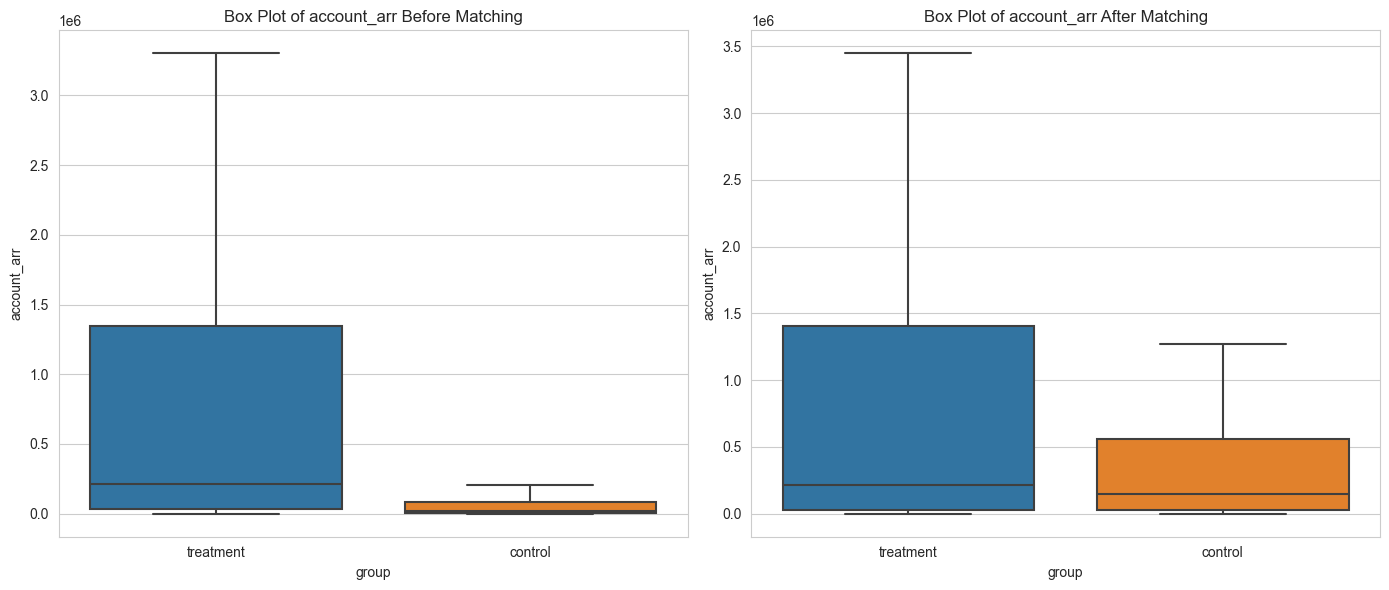

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for better visuals
sns.set_style('whitegrid')

# Define the order of groups explicitly
group_order = ['treatment', 'control']

# Box plot for continuous variable before matching
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='group', y='account_arr', data=data, showfliers=False, order=group_order)
plt.title('Box Plot of account_arr Before Matching')

# Box plot for continuous variable after matching
plt.subplot(1, 2, 2)
sns.boxplot(x='group', y='account_arr', data=combined_dataset, showfliers=False, order=group_order)
plt.title('Box Plot of account_arr After Matching')

plt.tight_layout()
plt.show()


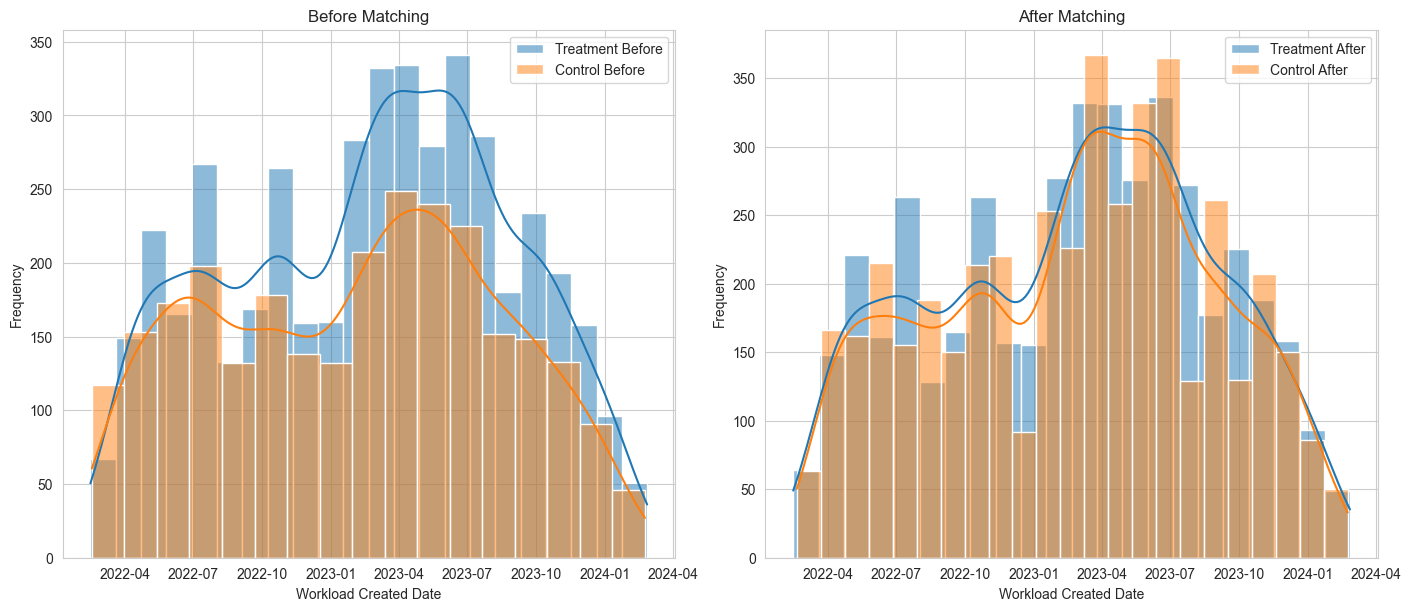

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot combined distributions with default colors
def plot_combined_distributions(data, combined_dataset):
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(14, 6), constrained_layout=True)
    
    # Plotting before matching
    sns.histplot(data[data['ps_wl'] == 1]['workload_created_date'], kde=True, ax=axs[0], label='Treatment Before')
    sns.histplot(data[data['ps_wl'] == 0]['workload_created_date'], kde=True, ax=axs[0], label='Control Before')
    axs[0].set_title('Before Matching')
    
    # Plotting after matching
    sns.histplot(combined_dataset[combined_dataset['ps_wl'] == 1]['workload_created_date'], kde=True, ax=axs[1], label='Treatment After')
    sns.histplot(combined_dataset[combined_dataset['ps_wl'] == 0]['workload_created_date'], kde=True, ax=axs[1], label='Control After')
    axs[1].set_title('After Matching')
    
    # Setting labels and legends for both plots
    for ax in axs:
        ax.set_xlabel('Workload Created Date')
        ax.set_ylabel('Frequency')
        ax.legend()

# Assuming 'data' is your initial DataFrame and 'combined_dataset' is after matching
plot_combined_distributions(data, combined_dataset)
plt.show()


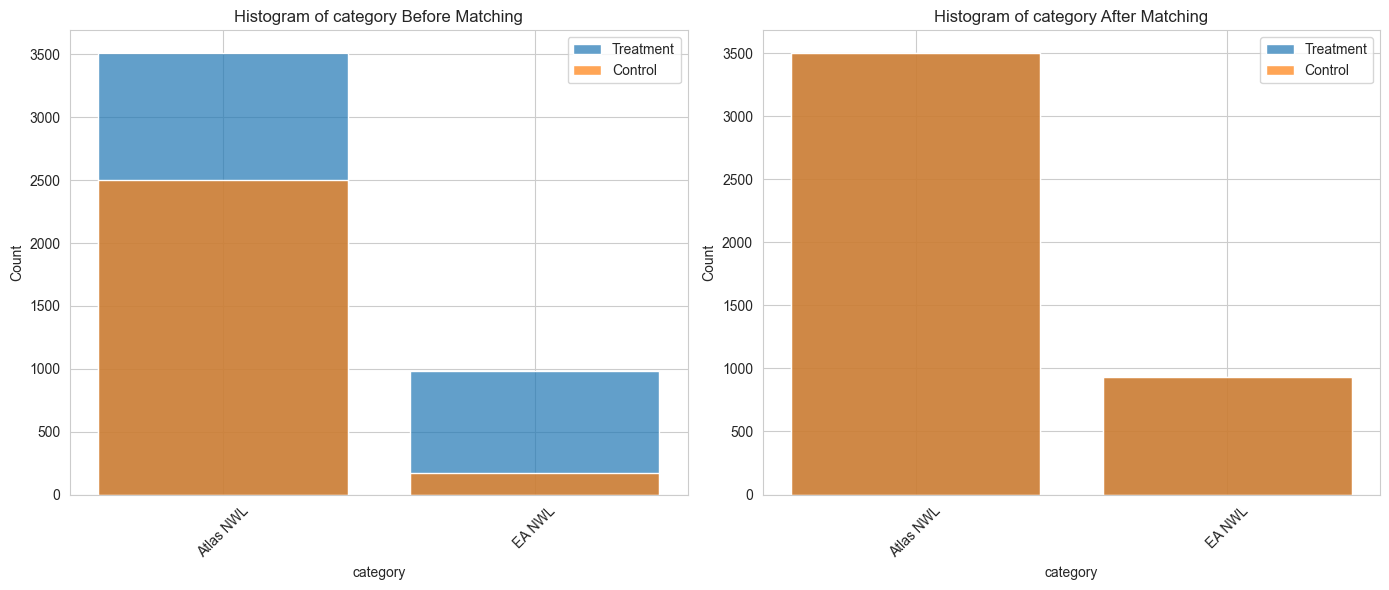

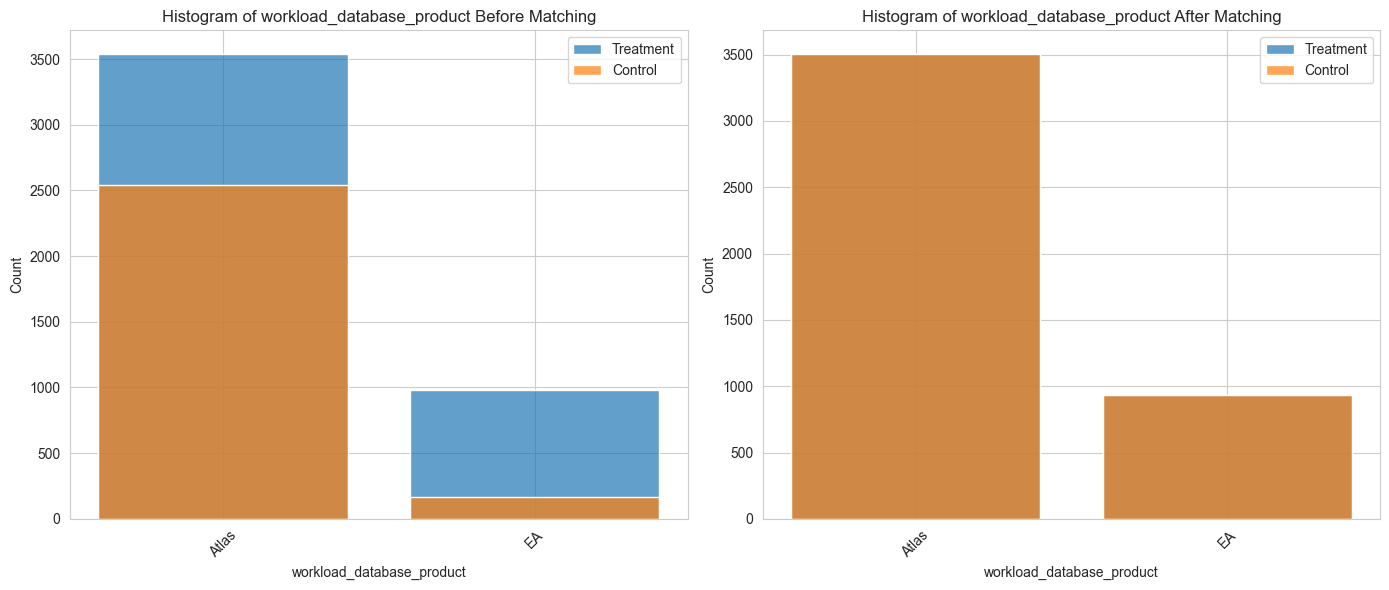

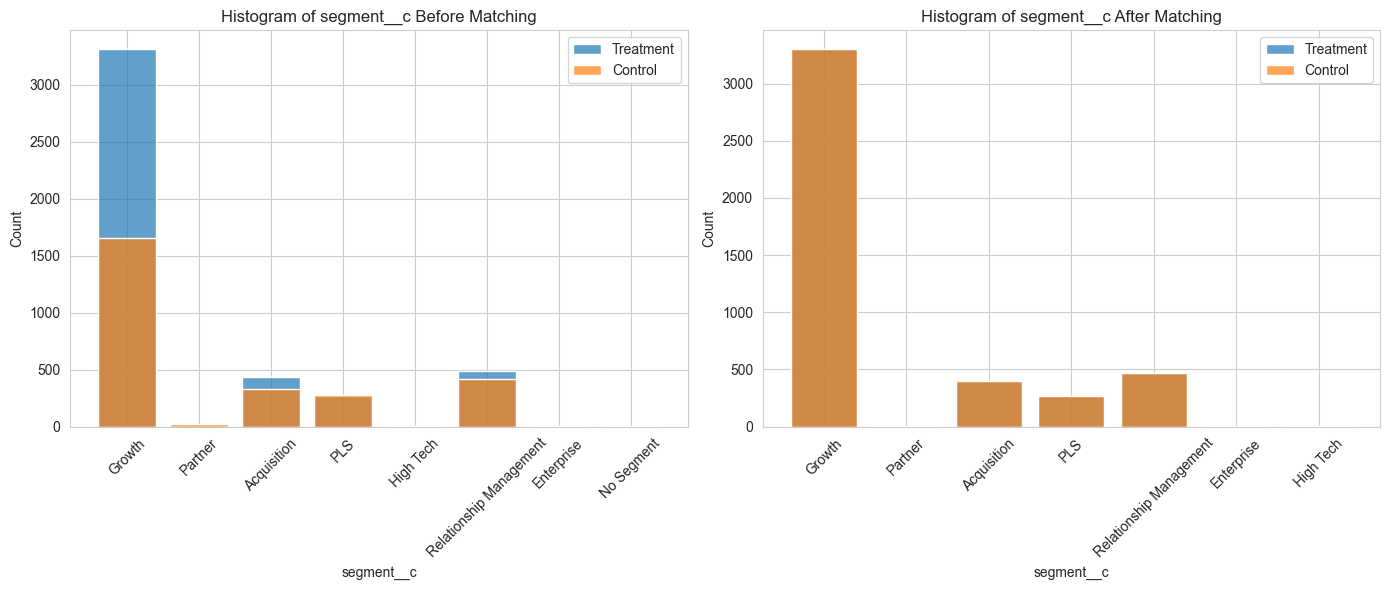

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for better visuals
sns.set_style('whitegrid')

# Define the list of categorical variables for the demonstration
categorical_vars = ['category', 'workload_database_product', 'segment__c']

# Create histograms for each categorical variable
for var in categorical_vars:
    plt.figure(figsize=(14, 6))

    # Before matching
    plt.subplot(1, 2, 1)
    sns.histplot(data=data[data['group'] == 'treatment'], x=var, label='Treatment', kde=False, stat="count", discrete=True, shrink=0.8, alpha=0.7)
    sns.histplot(data=data[data['group'] == 'control'], x=var, label='Control', kde=False, stat="count", discrete=True, shrink=0.8, alpha=0.7)
    plt.title(f'Histogram of {var} Before Matching')
    plt.xticks(rotation=45)
    plt.legend()

    # After matching
    plt.subplot(1, 2, 2)
    sns.histplot(combined_dataset[combined_dataset['group'] == 'treatment'], x=var, label='Treatment', kde=False, stat="count", discrete=True, shrink=0.8, alpha=0.7)
    sns.histplot(combined_dataset[combined_dataset['group'] == 'control'], x=var, label='Control', kde=False, stat="count", discrete=True, shrink=0.8, alpha=0.7)
    plt.title(f'Histogram of {var} After Matching')
    plt.xticks(rotation=45)
    plt.legend()

    plt.tight_layout()
    plt.show()


### Matching Approach #2 - Propensity Score Matching

In [18]:
# Create a copy of the original DataFrame and display the first few rows.
data = df_raw.copy()

In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from xgboost import XGBClassifier
from sklearn.neighbors import NearestNeighbors

# Convert 'workload_created_date' to datetime format
data['workload_created_date'] = pd.to_datetime(data['workload_created_date'])

# Set the reference date and calculate the number of days since the reference date
reference_date = pd.to_datetime('2022-01-01')
data['days_since_2022_01_01'] = (data['workload_created_date'] - reference_date).dt.days

# Encode categorical variables
categorical_columns = ['category', 'run_rate_type', 'workload_database_product', 'segment__c', 'area_group__c']
for column in categorical_columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column].astype(str))

# Use 'account_arr' directly without applying an artificial weight
data['account_arr'] = data['account_arr']  # This line is actually redundant and is shown for clarity. You can use 'account_arr' directly in 'model_columns'.

# Add or update group information based on 'ps_wl'
data['group'] = data['ps_wl'].apply(lambda x: 'treatment' if x == 1 else 'control')

# Update 'model_columns' to include the original 'account_arr' without scaling
model_columns = ['category', 'run_rate_type', 'workload_database_product', 'days_since_2022_01_01', 'account_arr', 'segment__c', 'area_group__c']

# Prepare the features (X) and the target variable (y)
X = data[model_columns]
y = data['ps_wl']  # Assuming 'ps_wl' is your target variable

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the standardized features and the target variable into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and train the XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# Predict propensity scores for the entire dataset with the standardized features
data['propensity_score'] = xgb_model.predict_proba(scaler.transform(X))[:, 1]

# Proceed with the treatment and control group processing and matching
treatment = data[data['ps_wl'] == 1].copy()
control = data[data['ps_wl'] == 0].copy()

# Fit NearestNeighbors model on control group's propensity scores
nn = NearestNeighbors(n_neighbors=1, metric='euclidean').fit(control[['propensity_score']])

# Find nearest neighbor in control for each treatment
_, nearest_indices = nn.kneighbors(treatment[['propensity_score']])

# Add the matched control index to the treatment DataFrame
treatment['matched_control_index'] = nearest_indices.flatten()

# Assign a unique pair index to each treatment instance
treatment['pair_index'] = range(1, len(treatment) + 1)

# Prepare the control matches with their pair indices
matched_controls = control.iloc[treatment['matched_control_index']].copy()
matched_controls['pair_index'] = treatment['pair_index'].values

# Combine treatment and matched control instances without duplicating 'group' column
matched_pairs = pd.concat([treatment, matched_controls]).reset_index(drop=True)

# Display the structure of the matches DataFrame
matched_pairs.head()

,workload_id,account_id,category,submission_date,run_rate_type,starting_run_rate__c,workload_run_rate_fy24_90version,workload_database_product,workload_created_date,workload_approved_date,workload_first_run_rate_arr_date,workload_approved_or_first_run_rate_arr_date,workload_owner_team,workload_current_owner_team,workload_owner_segment,workload_current_owner_segment,workload_owner_area_group,workload_current_owner_area_group,workload_6k_run_rate_arr_date,workload_12k_run_rate_arr_date,workload_25k_run_rate_arr_date,workload_50k_run_rate_arr_date,workload_100k_run_rate_arr_date,workload_maximum_run_rate_arr,workload_uses_search,workload_uses_device_sync,account_arr,first_arr_date,segment__c,area_group__c,ps_wl,days_since_2022_01_01,group,propensity_score,matched_control_index,pair_index
0,a2c6R000001CtJtQAK,001A000000xizppIAA,0,2023-03-15,3,0.00,13213.53,0,2023-03-11,2023-03-21,2023-03-11,2023-03-21,None,Growth AE,None,Growth,None,Americas,2023-05-01,2023-06-17,None,None,None,13827.84,False,False,23314014.0,2014-01-19,2,2,1,434,treatment,0.999724,182.0,1
1,a2c6R0000048IjGQAU,001A000001Wbj6wIAB,0,2023-05-04,0,0.00,2260.52,0,2023-04-13,2023-05-16,2023-05-14,2023-05-16,None,Acq AE,None,Acquisition,None,AMER,None,None,None,None,None,2335.00,False,False,635.0,2023-05-12,2,2,1,467,treatment,0.684512,1822.0,2
2,a2c6R000001CsIBQA0,0012K00001vHRLzQAO,0,2023-02-27,3,13859.53,135076.81,0,2023-02-27,2023-02-28,2023-02-27,2023-02-28,None,Growth AE,None,Growth,None,Americas,2023-02-27,2023-02-27,2023-02-27,2023-03-08,2023-03-26,231902.88,False,False,625240.0,2022-01-01,6,5,1,422,treatment,0.863355,893.0,3
3,a2c6R000001Cq8sQAC,0016R00003AQxf7QAD,1,2023-01-30,1,NaN,136321.00,1,2023-01-30,2023-01-30,2023-01-30,2023-01-30,None,Strategic AE,None,Growth,None,Americas,2023-01-30,2023-01-30,2023-01-30,2023-01-30,2023-01-30,136321.00,False,False,1061486.0,2017-08-04,2,2,1,394,treatment,0.968652,713.0,4
4,a2c6R000004OamEQAS,001A000001KJmhhIAD,0,2023-09-20,3,288545.91,66866.52,0,2023-09-15,2023-09-20,2023-09-30,2023-09-30,None,Growth AE,None,Growth,None,Americas,2023-10-24,2023-11-17,2023-11-28,2024-01-22,None,70678.96,False,False,1141788.0,2017-05-26,2,2,1,622,treatment,0.977487,182.0,5


#### Balance Check

In [20]:
# Count the number of instances in each group
group_counts = matched_pairs['group'].value_counts()

# Print the counts
print("Number of workloads in each group:")
print(group_counts)

Number of workloads in each group:
group
treatment    4522
control      4522
Name: count, dtype: int64


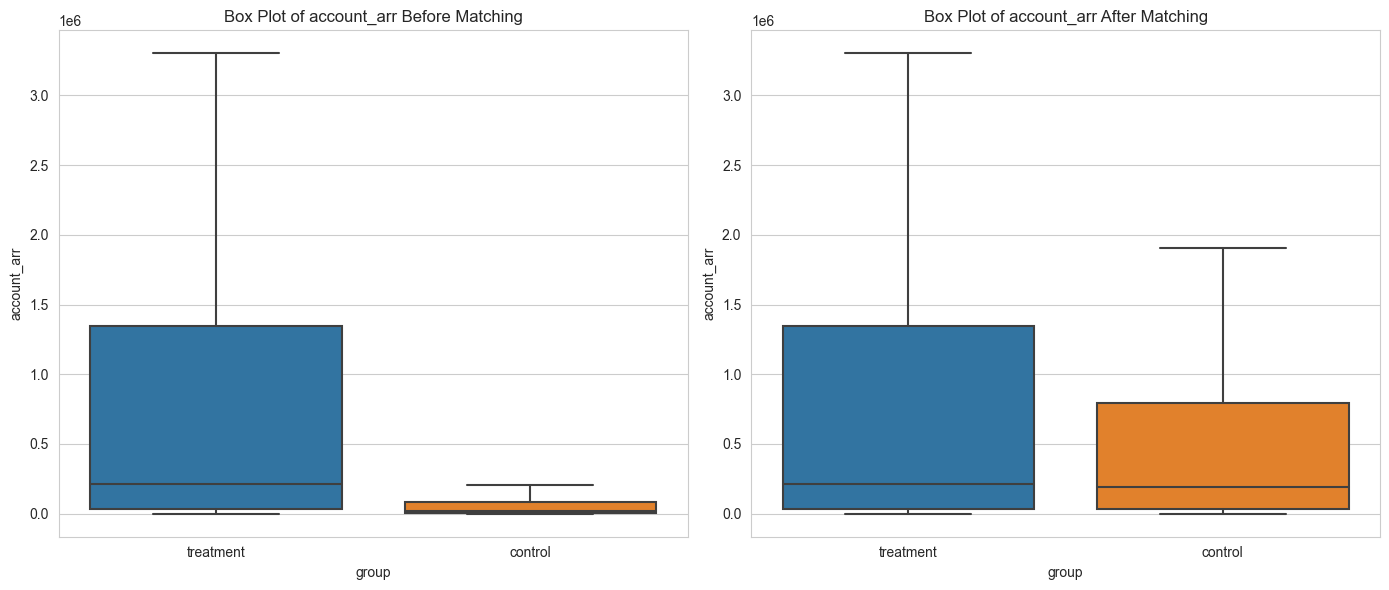

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for better visuals
sns.set_style('whitegrid')

# Define the order of groups explicitly
group_order = ['treatment', 'control']

# Box plot for continuous variable before matching
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='group', y='account_arr', data=data, showfliers=False, order=group_order)
plt.title('Box Plot of account_arr Before Matching')

# Box plot for continuous variable after matching
plt.subplot(1, 2, 2)
sns.boxplot(x='group', y='account_arr', data=matched_pairs, showfliers=False, order=group_order)
plt.title('Box Plot of account_arr After Matching')

plt.tight_layout()
plt.show()


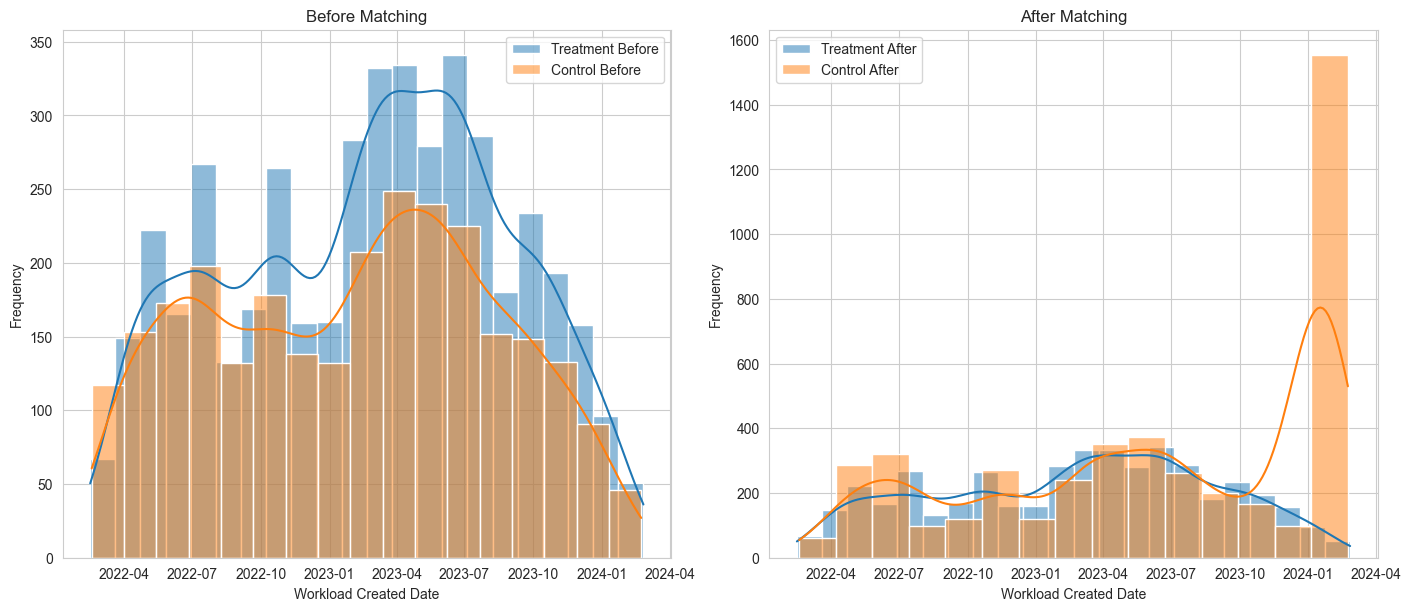

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot combined distributions with default colors
def plot_combined_distributions(data, combined_dataset):
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(14, 6), constrained_layout=True)
    
    # Plotting before matching
    sns.histplot(data[data['ps_wl'] == 1]['workload_created_date'], kde=True, ax=axs[0], label='Treatment Before')
    sns.histplot(data[data['ps_wl'] == 0]['workload_created_date'], kde=True, ax=axs[0], label='Control Before')
    axs[0].set_title('Before Matching')
    
    # Plotting after matching
    sns.histplot(matched_pairs[matched_pairs['ps_wl'] == 1]['workload_created_date'], kde=True, ax=axs[1], label='Treatment After')
    sns.histplot(matched_pairs[matched_pairs['ps_wl'] == 0]['workload_created_date'], kde=True, ax=axs[1], label='Control After')
    axs[1].set_title('After Matching')
    
    # Setting labels and legends for both plots
    for ax in axs:
        ax.set_xlabel('Workload Created Date')
        ax.set_ylabel('Frequency')
        ax.legend()

# Assuming 'data' is your initial DataFrame and 'combined_dataset' is after matching
plot_combined_distributions(data, combined_dataset)
plt.show()


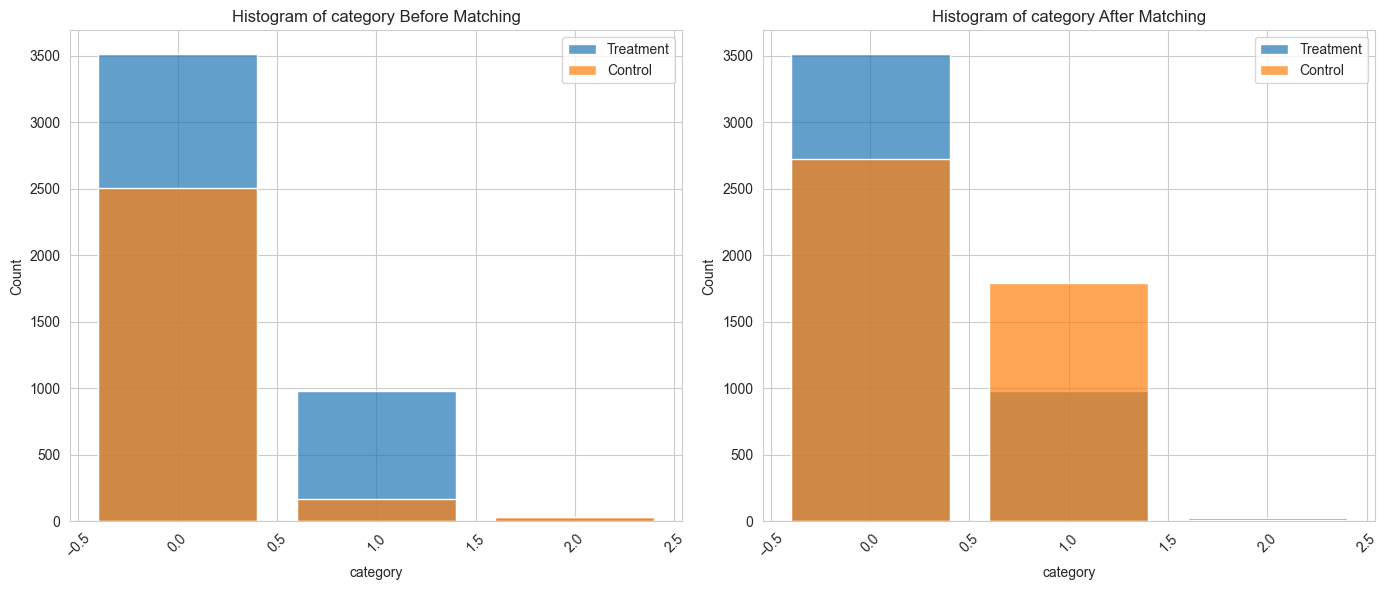

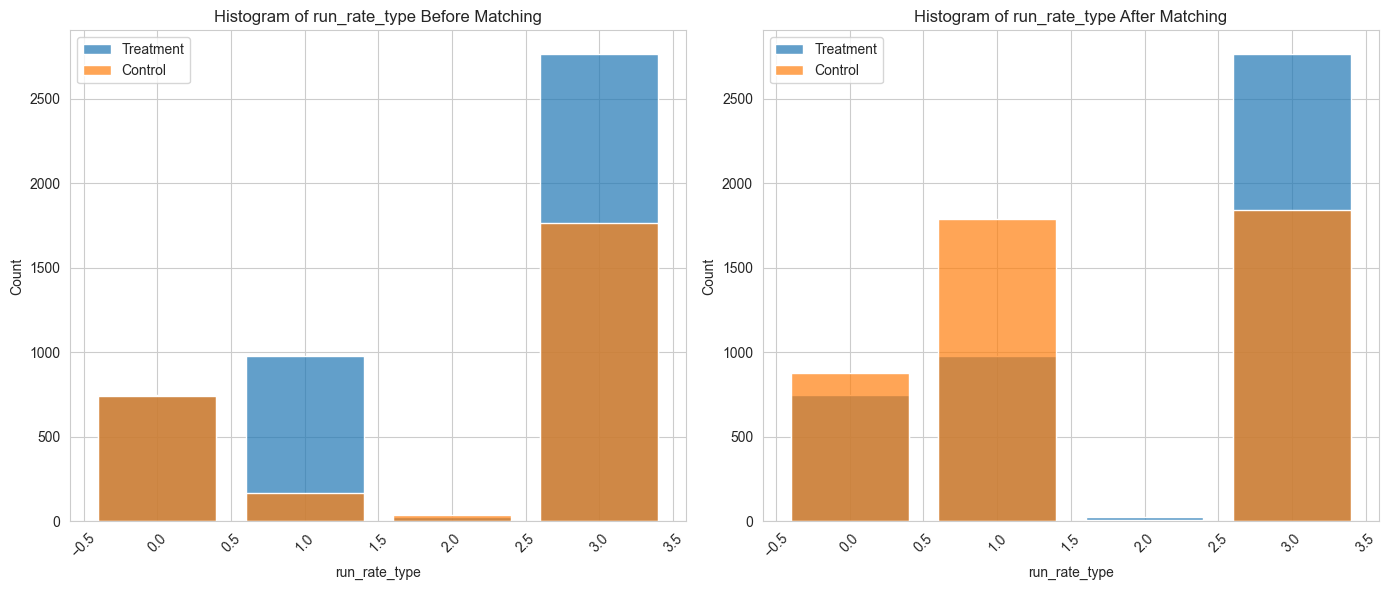

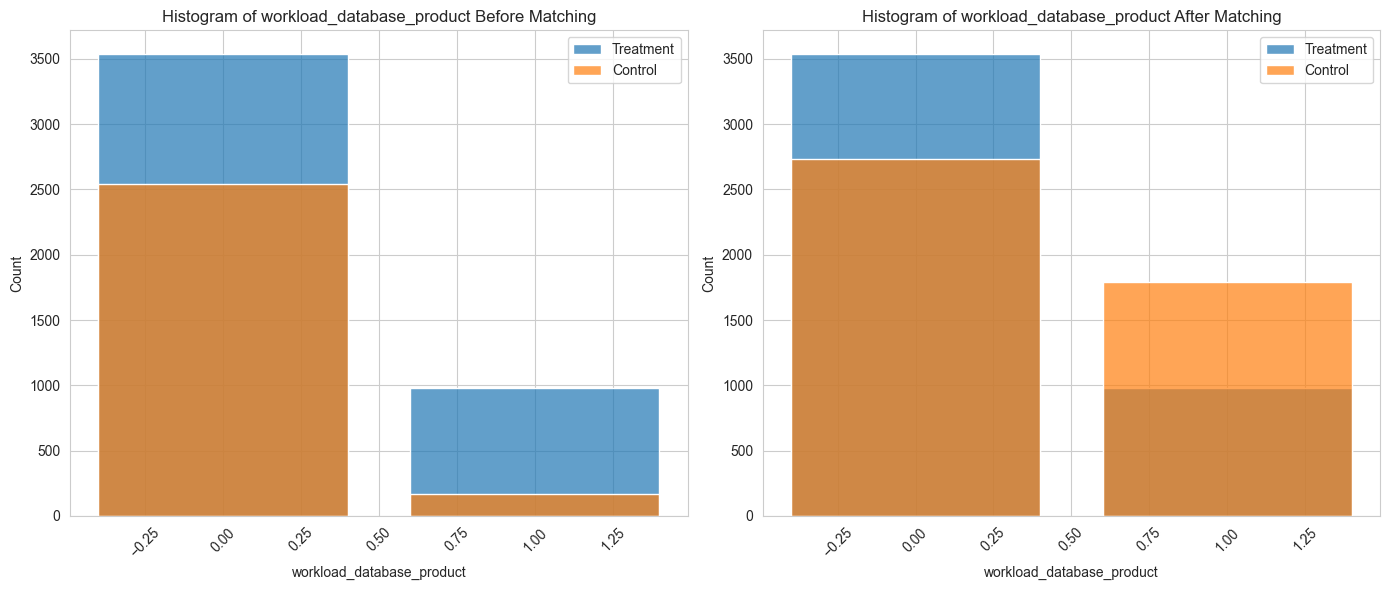

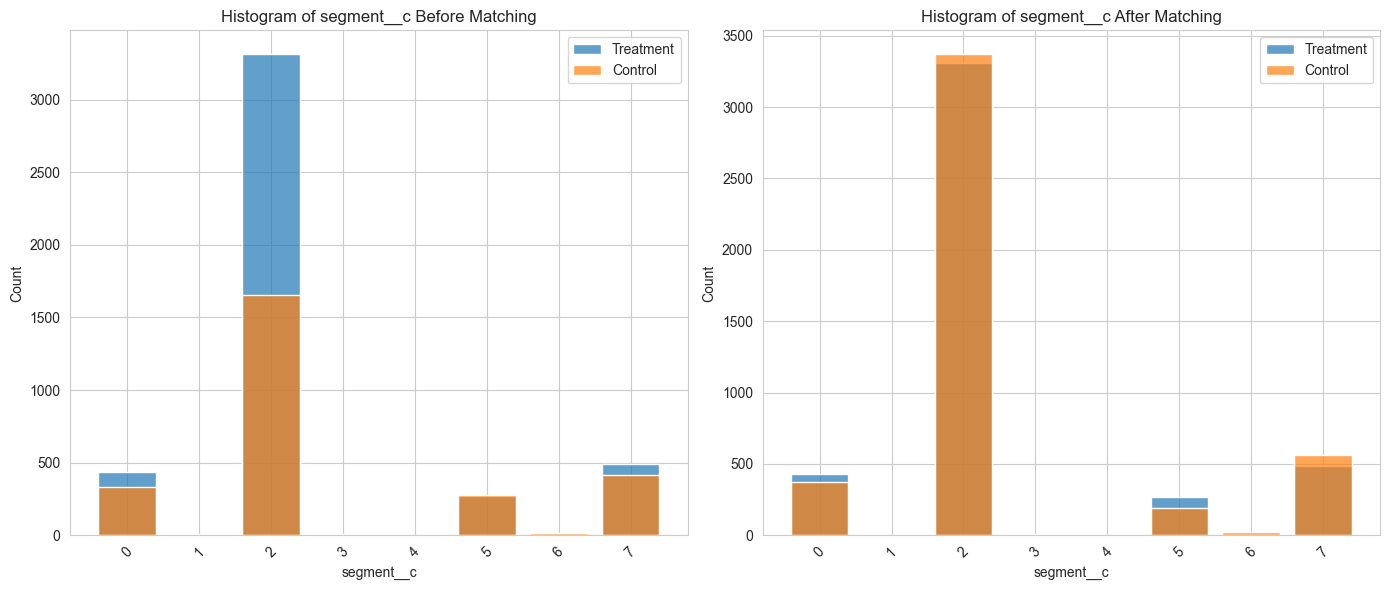

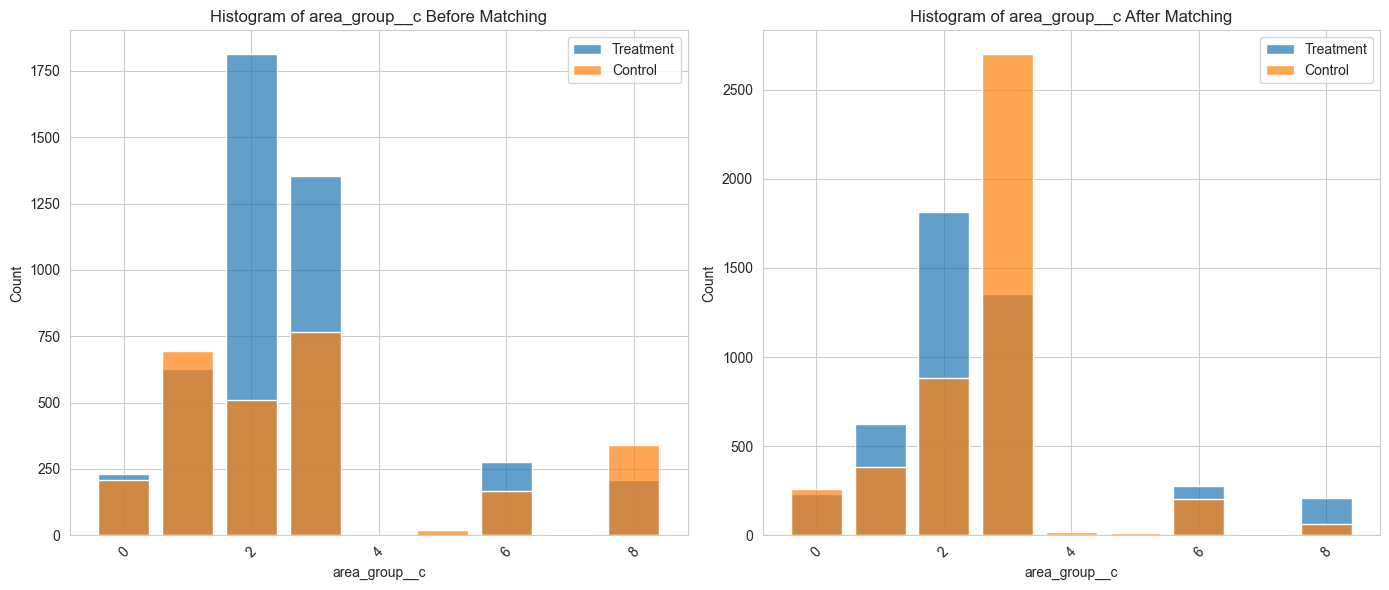

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for better visuals
sns.set_style('whitegrid')

# Define the list of categorical variables for the demonstration
categorical_vars = ['category', 'run_rate_type', 'workload_database_product', 'segment__c', 'area_group__c']

# Create histograms for each categorical variable
for var in categorical_vars:
    plt.figure(figsize=(14, 6))

    # Before matching
    plt.subplot(1, 2, 1)
    sns.histplot(data=data[data['group'] == 'treatment'], x=var, label='Treatment', kde=False, stat="count", discrete=True, shrink=0.8, alpha=0.7)
    sns.histplot(data=data[data['group'] == 'control'], x=var, label='Control', kde=False, stat="count", discrete=True, shrink=0.8, alpha=0.7)
    plt.title(f'Histogram of {var} Before Matching')
    plt.xticks(rotation=45)
    plt.legend()

    # After matching
    plt.subplot(1, 2, 2)
    # Use matched_pairs here instead of combined_dataset
    sns.histplot(matched_pairs[matched_pairs['group'] == 'treatment'], x=var, label='Treatment', kde=False, stat="count", discrete=True, shrink=0.8, alpha=0.7)
    sns.histplot(matched_pairs[matched_pairs['group'] == 'control'], x=var, label='Control', kde=False, stat="count", discrete=True, shrink=0.8, alpha=0.7)
    plt.title(f'Histogram of {var} After Matching')
    plt.xticks(rotation=45)
    plt.legend()

    plt.tight_layout()
    plt.show()
